In [1]:
"""Progetto_gruppo3.ipynb
"""

#%% IMPORT SECTION
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble 
from sklearn import tree

#%% DIRECTORY SETTINGS
# Change work directory
os.chdir('//srv0001/Risorse/Public/Gruppo3-Python')
cwd = os.getcwd()
print(cwd)


#%% PREPARE FUNCTION
def prepare_data(data):
   
    features = data.drop(["REF_DATE", "ICB_INDUSTRY_NUM", "ICB_SECTOR_NUM", "IS_FINANCIAL"], axis=1).astype("float64")
        
    return features


\\srv0001\Risorse\Public\Gruppo3-Python


In [2]:
#%% IMPORT DATA
#Import .csv
clean_data = pd.read_csv(r'Data/clean.csv', sep=';')
#print(clean_data)

raw = clean_data.copy()
raw.loc[raw.ICB_INDUSTRY_NUM==8000,'IS_FINANCIAL'] = 1
raw = raw.fillna(0)
filtered_data = raw.drop(["SEDOLCHK"], axis=1)


In [3]:
#%% K-FOLD VALIDATION
valid = filtered_data.to_numpy(copy=True)
N = valid.shape[0]
K = 100                                          # number of folds
preds_kfold = np.empty(N)
folds = np.random.randint(0, K, size=N)

for idx in np.arange(K):
    # For each fold, break your data into training and testing subsets
    data_train = pd.DataFrame(valid[folds != idx,:],columns=['REF_DATE','SIMPLE_TOT_RET','COMPOUND_TOT_RET','FIVE_YR_VOLATILITY_M','FIVE_YR_VOLATILITY_W','ADY','AERR','AGRE','APE','CGR','CV3Y_EPS','CV3Y_EREV_FY1','CV3Y_REP_EPS','CV3Y_REV_MARK','CV5Y_EPS','CV6M_P','CV6M_PM6M','DEBT_MKT_CAP','DY_FWD','DY_TRL','EBIT_SALES','ECM','EEREV','EPS_SIGMA','EPSDISP','EREV','F2GRE','FDY','FERR','FGRE','FPE','FWD_ECM','FWD_GRE','LRE','MKT_CAP_SALES','NM','PB','PM6MBIS','PM6MTRIS','PCF','PCTCHG_DPS','PCTCHG_EBIT','PCTCHG_EBIT_MARGIN','PCTCHG_EBITDA','PCTCHG_EQUITY','PCTCHG_NET_DEBT','PCTCHG_NM','PCTCHG_PRE_TAX_PROFIT','PCTCHG_ROE','PCTCHG_SALES','PCTCHG_UL_SALES','PE_FWD','PE_TRL','PM6M','RC1MEEREV','RC1MEREV','REC_MARK_1M','REC_MARK_3M','REV_MARK_1M','REV_MARK_3M','REV_STD_MARK','ROE','TRL_ECM','TRL_GRE','TURNOVER_1M','UL_SALES','PB_PCF_1','PB_PCF_2','ICB_INDUSTRY_NUM','ICB_SECTOR_NUM','IS_FINANCIAL'])
    data_test = pd.DataFrame(valid[folds == idx,:],columns=['REF_DATE','SIMPLE_TOT_RET','COMPOUND_TOT_RET','FIVE_YR_VOLATILITY_M','FIVE_YR_VOLATILITY_W','ADY','AERR','AGRE','APE','CGR','CV3Y_EPS','CV3Y_EREV_FY1','CV3Y_REP_EPS','CV3Y_REV_MARK','CV5Y_EPS','CV6M_P','CV6M_PM6M','DEBT_MKT_CAP','DY_FWD','DY_TRL','EBIT_SALES','ECM','EEREV','EPS_SIGMA','EPSDISP','EREV','F2GRE','FDY','FERR','FGRE','FPE','FWD_ECM','FWD_GRE','LRE','MKT_CAP_SALES','NM','PB','PM6MBIS','PM6MTRIS','PCF','PCTCHG_DPS','PCTCHG_EBIT','PCTCHG_EBIT_MARGIN','PCTCHG_EBITDA','PCTCHG_EQUITY','PCTCHG_NET_DEBT','PCTCHG_NM','PCTCHG_PRE_TAX_PROFIT','PCTCHG_ROE','PCTCHG_SALES','PCTCHG_UL_SALES','PE_FWD','PE_TRL','PM6M','RC1MEEREV','RC1MEREV','REC_MARK_1M','REC_MARK_3M','REV_MARK_1M','REV_MARK_3M','REV_STD_MARK','ROE','TRL_ECM','TRL_GRE','TURNOVER_1M','UL_SALES','PB_PCF_1','PB_PCF_2','ICB_INDUSTRY_NUM','ICB_SECTOR_NUM','IS_FINANCIAL'])


In [4]:
#%% PREPARE FEATURES
features = prepare_data(data_train)
#print(features)

for col in data_train.columns:
    if data_train[col].dtype==object: # and col!='SEDOLCHK':
        data_train[col]=pd.to_numeric(data_train[col],errors='coerce')
        
for col in data_test.columns:
    if data_test[col].dtype==object: # and col!='SEDOLCHK':
        data_test[col]=pd.to_numeric(data_test[col],errors='coerce')


        SIMPLE_TOT_RET  COMPOUND_TOT_RET  FIVE_YR_VOLATILITY_M  \
0               0.0616            0.0616                0.3930   
1               0.1607            0.1607                0.3452   
2               0.0489            0.0489                0.2102   
3               0.1337            0.1337                0.3508   
4              -0.0268           -0.0268                0.6543   
...                ...               ...                   ...   
104131         -0.0148           -0.0148                0.2703   
104132          0.0215            0.0215                0.2447   
104133         -0.0633           -0.0633                0.2145   
104134          0.0235            0.0235                0.3198   
104135         -0.0137           -0.0137                0.1827   

        FIVE_YR_VOLATILITY_W     ADY    AERR    AGRE      APE     CGR  \
0                     0.3944  0.0217  0.7146  0.1269  13.1687  0.1336   
1                     0.3675  0.0250  0.5070  1.1861  19.7183

1.0


[Text(432.3603524646826, 1607.502857142857, 'PB_PCF_1 <= 2.604\ngini = 0.359\nsamples = 104136\nvalue = [79671, 24465]'),
 Text(93.47731471977006, 1560.9085714285713, 'PCF <= 2.605\ngini = 0.119\nsamples = 22173\nvalue = [1404, 20769]'),
 Text(82.47998357626771, 1514.3142857142857, 'PB_PCF_1 <= 1.114\ngini = 0.19\nsamples = 1571\nvalue = [1404, 167]'),
 Text(54.98665571751181, 1467.72, 'PCF <= 1.12\ngini = 0.498\nsamples = 325\nvalue = [172, 153]'),
 Text(43.989324574009444, 1421.1257142857144, 'CV3Y_REP_EPS <= 0.166\ngini = 0.281\nsamples = 207\nvalue = [172, 35]'),
 Text(32.99199343050708, 1374.5314285714285, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(54.98665571751181, 1374.5314285714285, 'EBIT_SALES <= 0.422\ngini = 0.104\nsamples = 182\nvalue = [172, 10]'),
 Text(43.989324574009444, 1327.9371428571428, 'CV3Y_EREV_FY1 <= 0.936\ngini = 0.055\nsamples = 177\nvalue = [172, 5]'),
 Text(21.994662287004722, 1281.3428571428572, 'PCTCHG_DPS <= 0.578\ngini = 0.49\nsamples = 7\nvalu

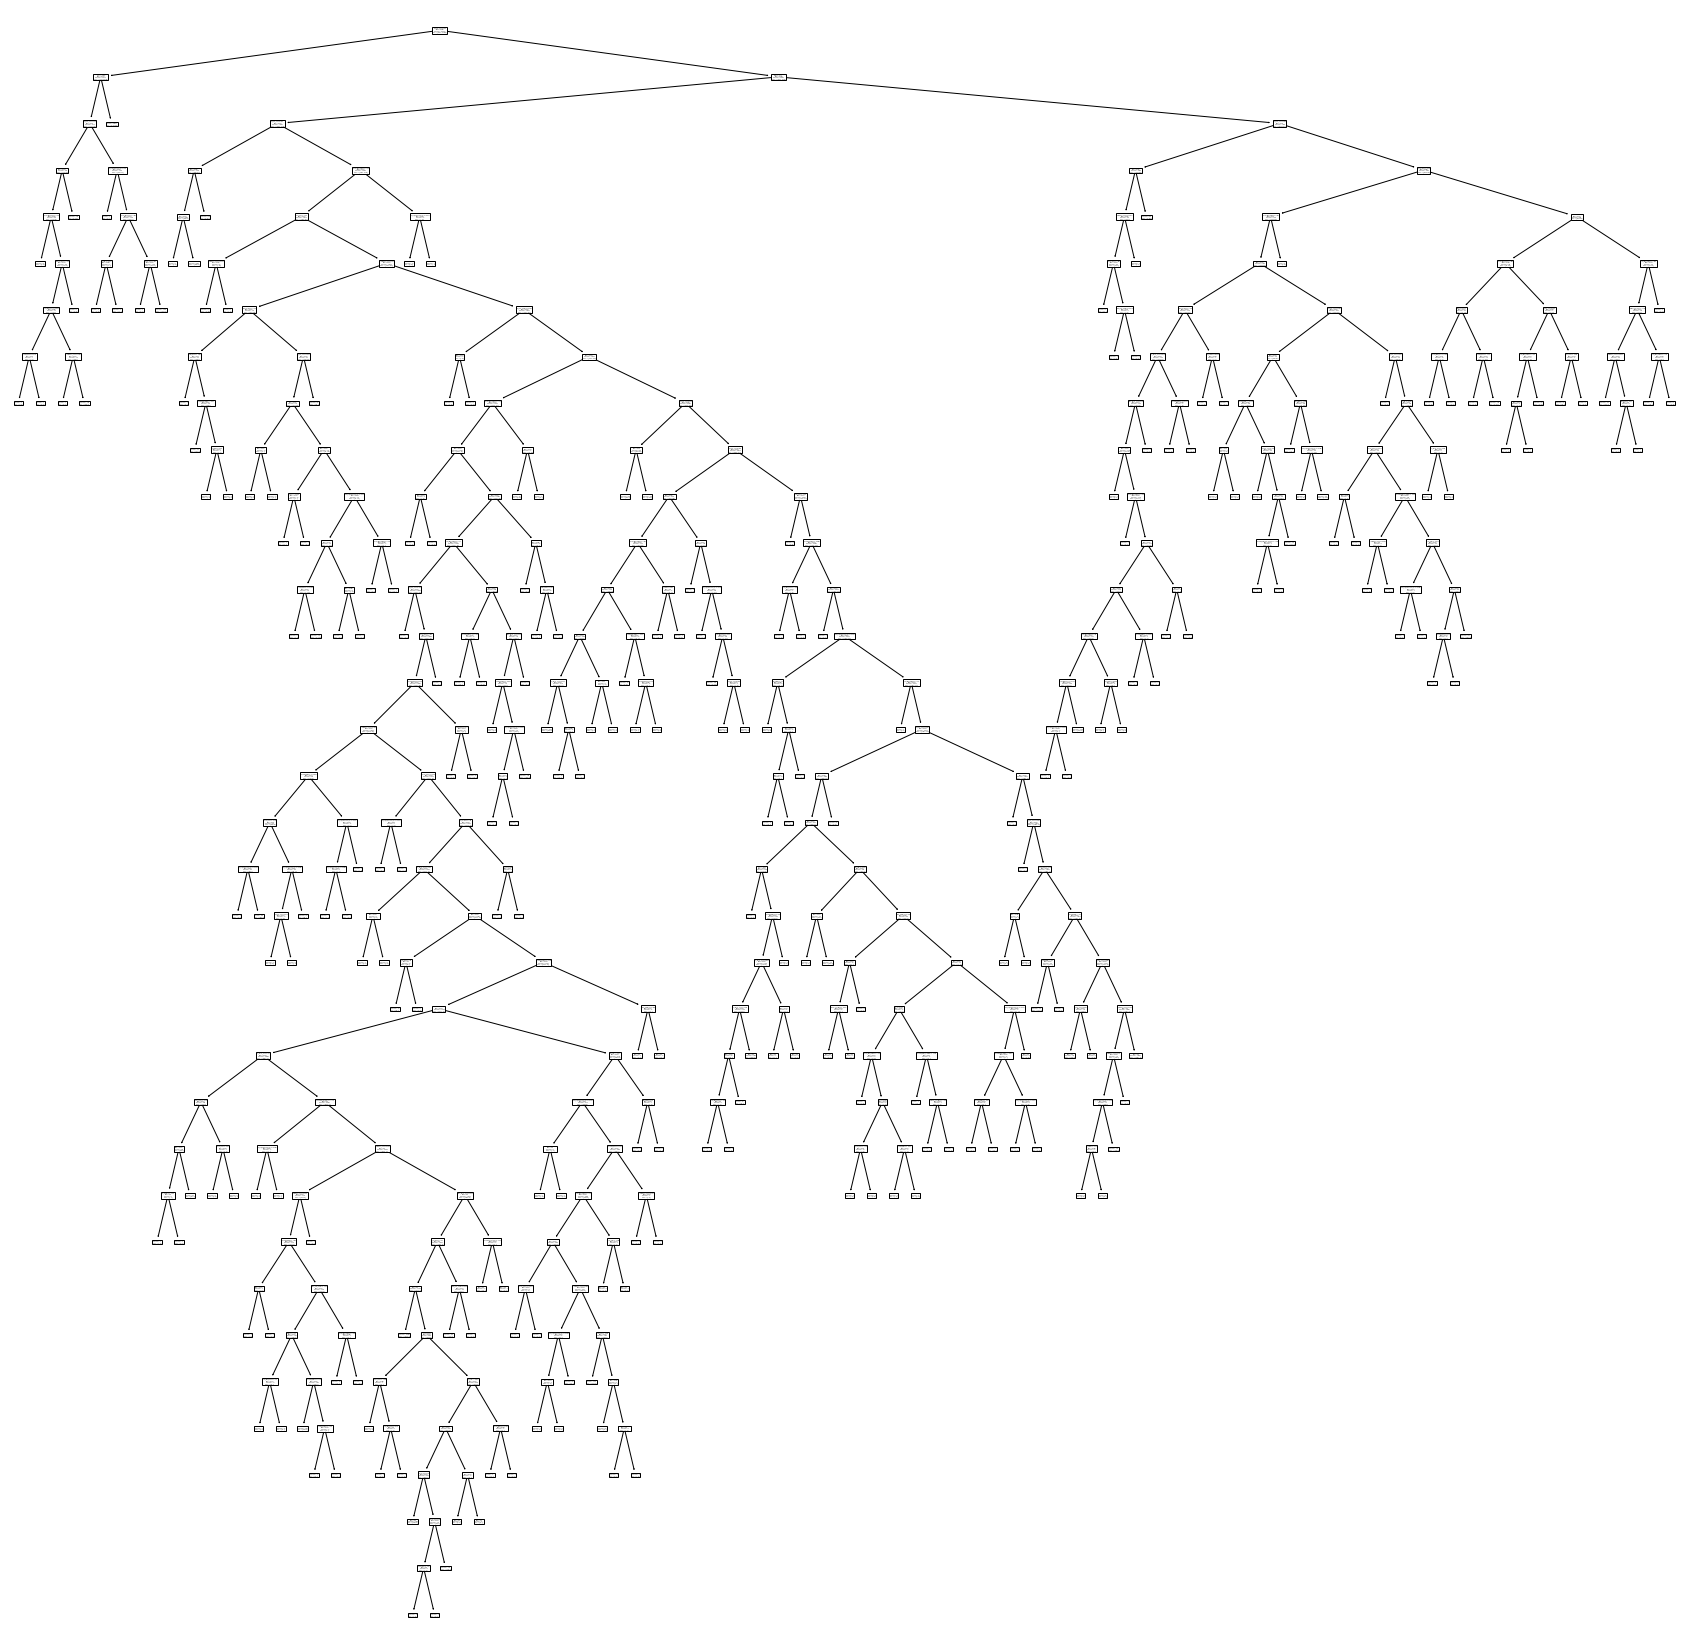

In [8]:
#%% SINGLE TREE
model = tree.DecisionTreeClassifier(max_depth = None)
model.fit(features, data_train["IS_FINANCIAL"])
print(model.score(prepare_data(data_train), data_train["IS_FINANCIAL"]))
model.score(prepare_data(data_test), data_test["IS_FINANCIAL"])

plt.figure(figsize=[30.0, 30.0])
tree.plot_tree(model, feature_names=features.columns)

In [6]:
#%% RANDOM FOREST
forest = ensemble.RandomForestClassifier(n_estimators=500, bootstrap=True, max_features=None)
forest.fit(features, data_train["IS_FINANCIAL"])
print(forest.score(prepare_data(data_train), data_train["IS_FINANCIAL"]))
forest.score(prepare_data(data_test), data_test["IS_FINANCIAL"])   



1.0


0.9990476190476191